In [1]:
#install.packages("MASS") 
library(tidyverse)
library(caret)
library(leaps)
library(MASS)
#tidyverse for easy data manipulation and visualization
#caret for easy machine learning workflow
#leaps,MASS for computing stepwise regression

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



## Download data

In [2]:
path_save_ = "D:/vm_exchange"
title_ = '_LB' #'_LB', '_all','_LSL'
#dataset = read.csv("data-marketing-budget-12mo.csv", header=T, colClasses = c("numeric", "numeric", "numeric"))
df = read.csv(file.path(path_save_, 'AVIFORUM','data','extracted_info_mobility_VF','visual','predict_KBF',title_,
                        'df_modelling.csv'),
              header = TRUE, sep = ";") #na.strings=c("","NA")
head(df,3)
dim(df)

HenID,li_severity,nbr_nan,max_severity,positive_rate_in_severity,max_positive_rate_in_severity,value_of_first_positive_rate_in_severity,li_severity_nonan,var_severity,ratio_HealingAndNonhealing,...,X..Strength....mean..,X..Mass....tuple..,X..Mass....nbr..,X..Mass....variance..,X..Mass....mean..,X..Width....tuple..,X..Width....nbr..,X..Width....variance..,X..Width....mean..,hybrid
hen_100,"[0.0, 0.0, 0.0, 4.5, 4.3, 3.0, 8.5, 8.6, 8.6, 8.7, 8.5]",0,8.7,"[4.5, 5.5, 0.09999999999999964, 0.09999999999999964, 0]",5.5,4.5,"[0.0, 0.0, 0.0, 4.5, 4.3, 3.0, 8.5, 8.6, 8.6, 8.7, 8.5]",13.076529,0.1666667,...,42.75000,"(59.6, 58.6, 67.7, 66.9)",4,17.015000,63.20000,"(0.3, 0.36, 0.3, 0.32)",3,0.0006000000,0.3200000,LB
hen_101,"[3.0, 2.9, 2.6, 5.1, 6.1, 6.2, 9.8, 9.4, 9.8, 9.7, 9.7]",0,9.8,"[2.4999999999999996, 1.0, 0.10000000000000053, 3.6000000000000005, 0.40000000000000036, 0]",3.6,2.5,"[3.0, 2.9, 2.6, 5.1, 6.1, 6.2, 9.8, 9.4, 9.8, 9.7, 9.7]",8.417025,0.1184211,...,48.60000,"(57.4, 58.2, 58.3, 56.0, 55.6)",5,1.240000,57.10000,"(0.31, 0.3, 0.26, 0.31, 0.27)",4,0.0004400000,0.2900000,LB
hen_102,"[0.0, 0.0, 0.0, 2.0, 4.3, 3.2, 2.8, 2.9, 3.2, 4.6, 3.7]",0,4.6,"[2.0, 2.3, 0.10000000000000009, 0.30000000000000027, 1.3999999999999995, 0]",2.3,2.0,"[0.0, 0.0, 0.0, 2.0, 4.3, 3.2, 2.8, 2.9, 3.2, 4.6, 3.7]",2.660165,0.3934426,...,49.66667,"(64.0, 63.6, 60.4)",3,2.595556,62.66667,"(0.34, 0.33, 0.36)",3,0.0001555556,0.3433333,LB


[1]   57 1086

In [3]:
summary(df)

     HenID                                                     li_severity
 hen_100: 1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8, 1.0, 2.0, 3.7]: 1  
 hen_101: 1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 2.4, 2.5, 2.3, 2.8, 3.0]: 1  
 hen_102: 1   [0.0, 0.0, 0.0, 0.0, 0.0, 2.7, 1.5, 1.8, 3.8, 3.8, 3.7]: 1  
 hen_103: 1   [0.0, 0.0, 0.0, 0.0, 0.0, 6.6, 6.5, 6.1, 6.4, 7.4, 7.1]: 1  
 hen_104: 1   [0.0, 0.0, 0.0, 0.0, 1.0, 1.2, 8.7, 8.5, 8.4, 8.4, 8.8]: 1  
 hen_105: 1   [0.0, 0.0, 0.0, 0.0, 1.0, 3.8, 6.3, 4.0, 4.2, 7.9, 8.2]: 1  
 (Other):51   (Other)                                                :51  
    nbr_nan        max_severity   
 Min.   :0.0000   Min.   : 3.000  
 1st Qu.:0.0000   1st Qu.: 5.800  
 Median :0.0000   Median : 8.000  
 Mean   :0.3158   Mean   : 7.298  
 3rd Qu.:0.0000   3rd Qu.: 8.500  
 Max.   :7.0000   Max.   :10.000  
                                  
                                                                                                      positive_rate_in_s

In [4]:
dim(df[df$hybrid == 'LB', ] )

[1]   57 1086

## Prepare data

In [14]:
li_var_cont = c('sess_1_day0_k2_topic_0_proba','sess_1_day0_k12_topic_0_proba',
           #'sess_1_day3_k6_topic_proba','sess_1_day4_k6_topic_proba','sess_1_day5_k6_topic_proba',
           'sess_1_day0_Variance_duration',
           'sess_1_day0_Median_duration',
           'sess_1_day0_duration_zone_1','sess_1_day0_duration_zone_5')
#li_var_cat = c('sess_1_day0_k6_topic') 
li_var_cat = c()
x = 'max_severity' #ratio_HealingAndNonhealing_round, max_positive_rate_in_severity, value_of_first_positive_rate_in_severity
#df_ = df[df$hybrid=='LB', ]
df_ = df[,c(li_var_cont, li_var_cat, x)]
#normalize
df_[,li_var_cont] = scale(df_[,li_var_cont])
df_

sess_1_day0_k2_topic_0_proba,sess_1_day0_k12_topic_0_proba,sess_1_day0_Variance_duration,sess_1_day0_Median_duration,sess_1_day0_duration_zone_1,sess_1_day0_duration_zone_5,max_severity
1.060193400,-0.63213022,0.427960847,0.900841444,-0.928286796,-0.36628261,8.7
-1.322717425,-0.85323103,-0.524173761,-0.979472765,-0.573409459,-0.36628261,9.8
-0.107763284,0.04300962,-0.515759370,-0.459621190,-0.406523551,-0.36628261,4.6
0.234156182,-0.37567104,2.336761432,-0.419065393,2.920315491,-0.36628261,8.6
-1.209427200,-0.76712957,0.580847134,-0.909421844,0.229035432,-0.36628261,7.7
0.299091859,-0.76110874,-0.565152498,-0.559167236,0.652016144,-0.36628261,9.2
-1.298241197,-0.85323103,-0.576030577,-0.736137985,-0.521624784,-0.35333860,6.7
1.228015134,-0.71906772,-0.040570004,0.314625837,0.122202340,-0.36628261,8.4
-0.413427253,-0.72149715,0.846422549,-0.219973300,-0.008564845,-0.36628261,8.4
1.046832994,-0.67880532,0.911607192,0.054700050,2.291936736,-0.15607184,3.8


In [15]:
#TODO
#remove outlier: remove std deviation / outlier depending on the size of the data
#avoid overfitting
#RF to choos topics data
#cross validation

## Model

In [16]:
print(dim(df_))

[1] 57  7


In [24]:
#Other alternatives are the penalized regression (ridge and lasso regression) (Chapter @ref(penalized-regression)) 
#and the principal components-based regression methods (PCR and PLS) (Chapter @ref(pcr-and-pls-regression)).
# Set seed for reproducibility
set.seed(20)
# Set up repeated k-fold cross-validation
train.control <- trainControl(method = "cv", number=2) #notenogh data points!!
# Train the model
#method: "leapBackward", to fit linear regression with backward selection
#        "leapForward", to fit linear regression with forward selection
#        "leapSeq", to fit linear regression with stepwise selection
#RMSE and MAE are two different metrics measuring the prediction error of each model. The lower the better
step.model <- train(max_severity ~., data=df_,
                    method = "leapForward", 
                    tuneGrid = data.frame(nvmax=1:4),
                    trControl = train.control, na.action = na.exclude) #na.exclude na.omit
step.model$results
print(step.model$bestTune)
summary(step.model$finalModel)

nvmax,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
1,1.769136,0.05844971,1.461902,0.03276384,0.034274656,0.07015392
2,1.808720,0.03681118,1.471143,0.06590885,0.030619952,0.15440882
3,1.858681,0.01315162,1.478598,0.03989640,0.016556845,0.13891799
4,1.939798,0.01373046,1.544709,0.11490589,0.008837307,0.17135640


  nvmax
1     1


Subset selection object
6 Variables  (and intercept)
                              Forced in Forced out
sess_1_day0_k2_topic_0_proba      FALSE      FALSE
sess_1_day0_k12_topic_0_proba     FALSE      FALSE
sess_1_day0_Variance_duration     FALSE      FALSE
sess_1_day0_Median_duration       FALSE      FALSE
sess_1_day0_duration_zone_1       FALSE      FALSE
sess_1_day0_duration_zone_5       FALSE      FALSE
1 subsets of each size up to 1
Selection Algorithm: forward
         sess_1_day0_k2_topic_0_proba sess_1_day0_k12_topic_0_proba
1  ( 1 ) " "                          "*"                          
         sess_1_day0_Variance_duration sess_1_day0_Median_duration
1  ( 1 ) " "                           " "                        
         sess_1_day0_duration_zone_1 sess_1_day0_duration_zone_5
1  ( 1 ) " "                         " "                        

outlier = boxplot(df_$max_severity, plot=FALSE)$out
df__ = df_[-which(df_$max_severity %in% outlier ) , ]
print(dim(df__),dim(df_))

#Remove outliers from dataframe
#Keep only the points within the bounds
no_outliers <- df %>%
  filter(max_severity < upper_bound & max_severity > lower_bound)

#Check range of no_outliers to make sure it's within bounds
range(no_outliers$pH)

In [23]:
#maximal number of predictors to incorporate in the model. It returns multiple models with different size up to nvmax
#method = “backward”, “forward” and “seqrep” (seqrep = sequential replacement, combination of forward and backward selections).
models <- regsubsets(max_severity~., data=df_, nvmax = 3,
                     method = "forward")
summary(models)

Subset selection object
Call: regsubsets.formula(max_severity ~ ., data = df_, nvmax = 3, method = "forward")
6 Variables  (and intercept)
                              Forced in Forced out
sess_1_day0_k2_topic_0_proba      FALSE      FALSE
sess_1_day0_k12_topic_0_proba     FALSE      FALSE
sess_1_day0_Variance_duration     FALSE      FALSE
sess_1_day0_Median_duration       FALSE      FALSE
sess_1_day0_duration_zone_1       FALSE      FALSE
sess_1_day0_duration_zone_5       FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: forward
         sess_1_day0_k2_topic_0_proba sess_1_day0_k12_topic_0_proba
1  ( 1 ) " "                          "*"                          
2  ( 1 ) " "                          "*"                          
3  ( 1 ) "*"                          "*"                          
         sess_1_day0_Variance_duration sess_1_day0_Median_duration
1  ( 1 ) " "                           " "                        
2  ( 1 ) " "                          

In [25]:
# Fit the full model 
full.model <- lm(max_severity ~., data=df_)
# Stepwise regression model
step.model <- stepAIC(full.model, direction = "forward", trace = TRUE)
summary(step.model)

Start:  AIC=73.74
max_severity ~ sess_1_day0_k2_topic_0_proba + sess_1_day0_k12_topic_0_proba + 
    sess_1_day0_Variance_duration + sess_1_day0_Median_duration + 
    sess_1_day0_duration_zone_1 + sess_1_day0_duration_zone_5




Call:
lm(formula = max_severity ~ sess_1_day0_k2_topic_0_proba + sess_1_day0_k12_topic_0_proba + 
    sess_1_day0_Variance_duration + sess_1_day0_Median_duration + 
    sess_1_day0_duration_zone_1 + sess_1_day0_duration_zone_5, 
    data = df_)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9921 -1.1111  0.5181  1.2236  3.4789 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.3418     0.2485  29.550   <2e-16 ***
sess_1_day0_k2_topic_0_proba   -0.2273     0.4501  -0.505   0.6159    
sess_1_day0_k12_topic_0_proba  -0.7270     0.3935  -1.848   0.0708 .  
sess_1_day0_Variance_duration  -0.0547     0.2861  -0.191   0.8492    
sess_1_day0_Median_duration     0.5279     0.4768   1.107   0.2737    
sess_1_day0_duration_zone_1    -0.0629     0.3261  -0.193   0.8479    
sess_1_day0_duration_zone_5     0.0138     0.2559   0.054   0.9572    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual 

In [212]:
model.max_severity = lm(max_severity~sess_1_day0_k6_topic_5_proba+hybrid,
                data=df)
summary(model.max_severity)


Call:
lm(formula = max_severity ~ sess_1_day0_k6_topic_5_proba + hybrid, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0815 -1.3138  0.4857  1.2337  3.9305 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    7.0143     0.4392  15.969   <2e-16 ***
sess_1_day0_k6_topic_5_proba   1.0164     1.0967   0.927    0.356    
hybridLSL                     -1.0467     0.4606  -2.272    0.025 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.935 on 108 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1109,	Adjusted R-squared:  0.09444 
F-statistic: 6.736 on 2 and 108 DF,  p-value: 0.00175


In [15]:
model.max_severity = lm(max_severity~sess_1_day0_k6_topic_5_proba*hybrid,
                data=df)
summary(model.max_severity)


Call:
lm(formula = max_severity ~ sess_1_day0_k6_topic_5_proba * hybrid, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9694 -1.2067  0.3871  1.3018  4.0121 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                              6.8233     0.4701  14.516   <2e-16 ***
sess_1_day0_k6_topic_5_proba             1.6091     1.2142   1.325    0.188    
hybridLSL                               -0.6776     0.5640  -1.202    0.232    
sess_1_day0_k6_topic_5_proba:hybridLSL  -3.1824     2.8135  -1.131    0.261    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.932 on 107 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1214,	Adjusted R-squared:  0.09678 
F-statistic: 4.929 on 3 and 107 DF,  p-value: 0.003025


## Plot Diagnostics

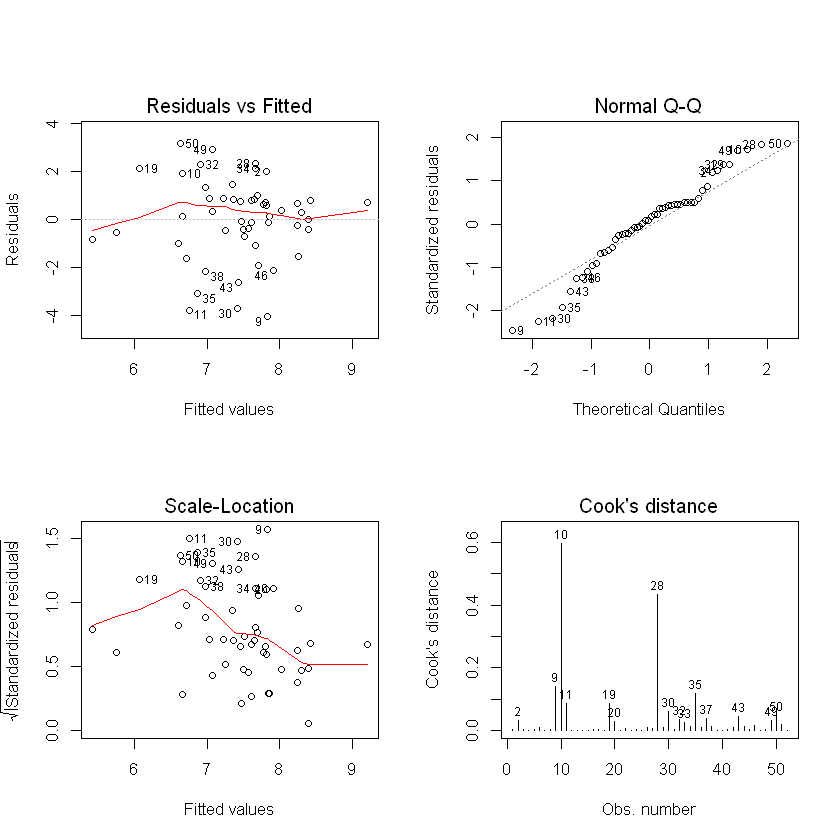

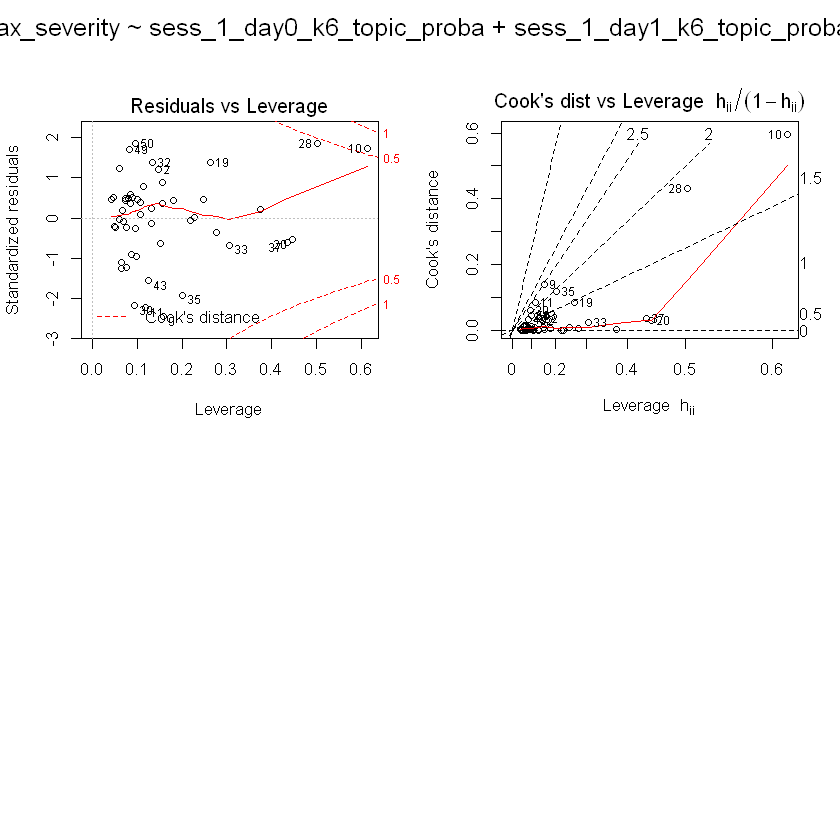

In [200]:
#a plot of residuals against fitted values, a Scale-Location plot of sqrt(| residuals |) against fitted values, a Normal 
#Q-Q plot, a plot of Cook's distances versus row labels, a plot of residuals against leverages, and a plot of Cook's distances
#against leverage/(1-leverage). By default, the first three and 5 are provided.
#https://stat.ethz.ch/R-manual/R-devel/library/stats/html/plot.lm.html
#id.n: number of points to be labelled in each plot, starting with the most extreme. (Null, 15,...)
par(mfrow = c(2, 2), oma = c(0, 0, 2, 0))
plot(step.model, id.n=15, labels.id=NULL, which=1:6) 
#residual vs fitted: mean of zero, random, cst variance